In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from lafferty_sriver import lafferty_sriver

In [2]:
# Read test case: Seattle
df = pd.read_csv('./seattle_avg_tas.csv')

# lat/lon doesn't matter here
df['lat'] = -1
df['lon'] = -1

# Make xarray dataset
ds = xr.Dataset.from_dataframe(df.set_index(['lat','lon','ssp','model','ensemble','time']))

In [3]:
ds

<xarray.Dataset>
Dimensions:   (lat: 1, lon: 1, ssp: 4, model: 22, ensemble: 5, time: 86)
Coordinates:
  * lat       (lat) int64 -1
  * lon       (lon) int64 -1
  * ssp       (ssp) object 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * model     (model) object 'ACCESS-ESM1-5' 'BCC-CSM2-MR' ... 'UKESM1-0-LL'
  * ensemble  (ensemble) object 'CIL' 'DeepSD-BC' 'GARD-SV' 'ISIMIP' 'NEX'
  * time      (time) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    tas       (lat, lon, ssp, model, ensemble, time) float64 12.36 ... 22.19

In [4]:
# Perform variance decomposition
U_out = lafferty_sriver(ds, 'tas', True)

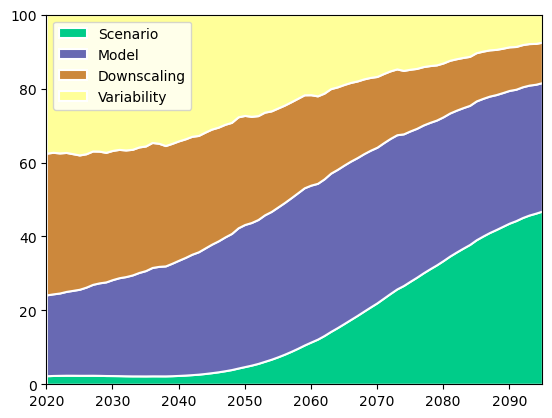

In [5]:
# This matches Fig 1.e in paper

uncert_dict = {
        "Scenario": U_out.sel(uncertainty='scenario').to_numpy().flatten(),
        "Model": U_out.sel(uncertainty='model').to_numpy().flatten(),
        "Downscaling": U_out.sel(uncertainty='ensemble').to_numpy().flatten(),
        "Variability": U_out.sel(uncertainty='variability').to_numpy().flatten(),
    }


fig, ax = plt.subplots()
ax.stackplot(
        np.arange(2015, 2101),
        uncert_dict.values(),
        labels=uncert_dict.keys(),
        alpha=1,
        colors=["#00CC89", "#6869B3", "#CC883C", "#FFFF99"],
        edgecolor="white",
        lw=1.5,
)
ax.set_xlim([2020,2095])
ax.set_ylim([0,100])
ax.legend(loc='upper left')
plt.show()